In [6]:
import numpy as np
from qiskit import *
from random import random, randint
import matplotlib.pyplot as plt

In [31]:
def process_output(circuit, quantum_reg, classical_reg, s):
    # s = 100 # arbitrary S, will shift to match output later
    arr = []

    simulator = Aer.get_backend('aer_simulator')

    job = execute(circuit, simulator, shots=s)
    result = job.result()
    counts = result.get_counts(circuit)
    return counts

def parity_probabilities(counts, shots=100):
    class_0 = 0
    class_1 = 0

    for keyBefore, value in counts.items():
        key = keyBefore.split()[0]
        temp = int(key[0]) ^ int(key[1])
        for i in range(2, len(key)):
            temp = temp ^ int(key[i])
        
        if temp == 0:
            class_0 += value
        else:
            class_1 += value
    return {0: class_0 / shots, 1: class_1 / shots}

def rotation(register, angles, qc):

    measurement = ClassicalRegister(len(register))
    qc.add_register(measurement)
    for i in range(len(register)):
        qc.ry(angles[i], i)
    
    for i in range(len(register) - 1, 0, -1):
        qc.cx(i, i - 1)

    qc.cx(0, len(register) - 1)

    qc.measure_all()
    s = 100
    shots = process_output(qc, register, measurement, 100)
    
    parity_processed = parity_probabilities(shots)
    return parity_processed

q = QuantumRegister(4)
initial_angles = [2 * np.pi * random() for _ in range(4)]
len(q)

measured = rotation(q, initial_angles, QuantumCircuit(q))

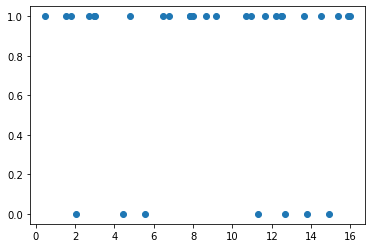

In [11]:
# random samples, toy data
entries = 32

x = []
for _ in range(entries):
    temp = 20 * random()
    while temp in x:
        temp = 20 * random()
    x.append(temp)

y = [randint(0, 1) for _ in range(entries)]

plt.scatter(x, y)

def mse(shots_count, expected_value):
    probability_of_expected = shots_count[expected_value]
    return (1 - probability_of_expected) ** 2

# y_values are either 0, 1
# received_measurements are the dictionary of probabilities
def count_costs(x_values, y_values, angles, received_measurements):
    cost = 0

    for i in range(len(x_values)):
        cost += mse(received_measurements[i], y_values[i])
    
    return cost / len(x_values)

count_costs(x, y, initial_angles, )


In [ ]:
def derivative_right(previous, current, delta):
    return (current - previous) / delta

def derivative_up(previous, current, delta):
    return (current - previous) / delta

def optimize_angles(angles, cost, delta=1):
    new_angles = []
    new_cost = 0

    for i in range(len(angles)):
        q_reg = QuantumRegister(len(angles))
        qc = QuantumCircuit(q_reg)
        



In [19]:
# format data
from feature_mapping_initialize_method import *

q = QuantumRegister(4)

initial_angles = [2 * np.pi * random() for _ in range(4)]

qc = QuantumCircuit(q)

rotation(q, initial_angles, qc)

#created a test array: actual array should be the raw data (to be normalized)
array = [0, 1, 0, 3, 4, 8, 10, 2]

arr = normalize_data(x)
circuit.initialize(arr, circuit.qubits)

